In [1]:
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import load_img
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "//DC1\data/rotimi.kolawole/My Documents//Cat n dogs images"
for class_ in os.listdir(path):
    print(class_)

archive.zip
new_path


In [3]:
path_ = path + "/" +'archive.zip' # here is xthe file path that contains the zipped folder

In [4]:
# import zipfile module  and unzipping the folder that contains jpegs of cats n dogs to a new file path
from zipfile import ZipFile

with ZipFile(path_, 'r') as f:
    f.extractall(path+"/" + "new_path")
    

In [5]:
file_path = path+"/" + "new_path" + "/" + "train"

In [9]:
file_path

'//DC1\\data/rotimi.kolawole/My Documents//Cat n dogs images/new_path/train'

In [12]:
for k in os.listdir(file_path):
    print(k)
    

cat
classname.txt
dog


In [13]:
file_path + "/" + "cat"

'//DC1\\data/rotimi.kolawole/My Documents//Cat n dogs images/new_path/train/cat'

In [14]:
label = []
inputh_path = []
list_dict  = []


# iterating over the files in the new folder created
for Class in os.listdir(file_path):
    for j in os.listdir(file_path + "/" + Class):
        

        # using a checker to check if the image is a dog or cat and encode 0 if cat and 1 if dog
        if Class == "cat":
            label.append(0)
        else:
            label.append(1)
        file_renew = os.path.join(file_path,Class , j)
        inputh_path.append(file_renew.split("/")[-1])
        dict_ = {"label":label,"inputh_path" : inputh_path}
    list_dict.append(dict_)
       

In [15]:
df = pd.DataFrame({"label":[label],"inputh_path" : [inputh_path]})

In [16]:
data = {"inputh":inputh_path ,"label": label}

In [17]:
df = pd.DataFrame(data)

In [18]:
df.sample(frac= 1).reset_index(drop = True)

,inputh,label
0,train\dog\japanese_chin_105_jpg.rf.16512f07fad...,1
1,train\dog\chihuahua_14_jpg.rf.a81475719cea2cae...,1
2,train\dog\english_cocker_spaniel_160_jpg.rf.92...,1
3,train\dog\boxer_142_jpg.rf.2be5635e118f51216d9...,1
4,train\dog\pug_162_jpg.rf.be69766ec99329309cad7...,1
...,...,...
270,train\dog\yorkshire_terrier_174_jpg.rf.9276193...,1
271,train\dog\shiba_inu_183_jpg.rf.0ab5e35c66b37de...,1
272,train\dog\wheaten_terrier_141_jpg.rf.ce5fe30e4...,1
273,train\cat\Egyptian_Mau_107_jpg.rf.196d90df84e6...,0


In [19]:
temp = df[df["label"]==1]['inputh']

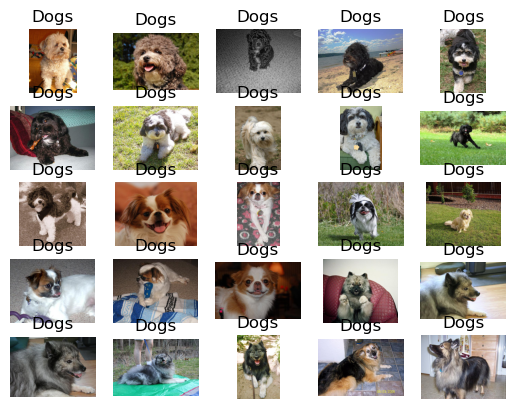

In [14]:
temp = df[df["label"]==1]['inputh']
start = np.random.randint(0,len(temp))


files = temp[start : start +25]

for ind,file in enumerate(files):
    
    plt.subplot(5,5,ind+1)
    img_ = load_img(file)
    convecter = np.array(img_)
    plt.imshow(convecter)
    plt.title("Dogs")
    plt.axis('off')
    


#### Visualize for Cat

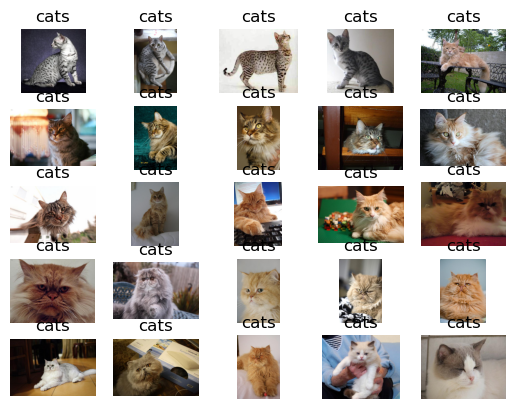

In [20]:
temp2 = df[df["label"]==0]['inputh']

start = np.random.randint(0,len(temp2))


files = temp2[start : start +25]

for ind,file in enumerate(files):
    
    plt.subplot(5,5,ind+1)
    img_ = load_img(file)
    convecter = np.array(img_)
    plt.imshow(convecter)
    plt.title("cats")
    plt.axis('off')
    

In [21]:
import seaborn as sb

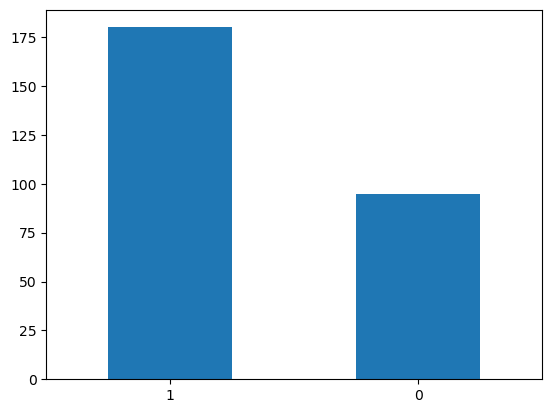

In [22]:
df["label"].value_counts().plot(kind = "bar")
plt.xticks(rotation = 360);

here we have more classes of cat than dog, the dataset is unbalanced

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
train, test = train_test_split(df , test_size= .2 , random_state= 42)

In [25]:
from keras.preprocessing.image import ImageDataGenerator

In [34]:
ImageDataGenerator?

In [63]:
train_generator = ImageDataGenerator(rescale=  1./255, #Normalization of images
                  rotation_range= 40,# Augmentation of images to avoid overfitting ,
                   shear_range = .2 ,
                   zoom_range = .2,
                   horizontal_flip = True,
                   fill_mode=   'nearest',
                  )

# This will help in training the data and also help the model to lear well

                

In [124]:
Val_generator = ImageDataGenerator(rescale= 1./255)


In [43]:
df["label"] = df["label"].astype('str')

In [125]:
train_iterator = train_generator.flow_from_dataframe(train,
                                                     x_col= "inputh" ,
                                                     y_col= "label", 
                                                     target_size= (128,128),
                                                     batch_size=51 , 
                                                     class_mode= 'binary')

Val_iterator = Val_generator.flow_from_dataframe(test,
                                                     x_col= "inputh" ,
                                                     y_col= "label", 
                                                     target_size= (128,128),
                                                     batch_size=51 , 
                                                     class_mode= 'binary')


# train and processing the images for our models.

Found 220 validated image filenames belonging to 2 classes.
Found 55 validated image filenames belonging to 2 classes.


In [46]:
from keras import Sequential
from keras.layers import Conv2D,MaxPool2D , Flatten , Dense

In [126]:
model = Sequential([Conv2D(16, (3,3), activation = 'relu', input_shape = (128,128,3)),
            MaxPool2D((2,2)),
            Conv2D(32, (3,3) , activation= "relu" ),
            MaxPool2D((2,2)),
            Conv2D(64,(3,3), activation = 'relu'),
            MaxPool2D ((2,2 )),
            Flatten(),# convert the layers into single dimension array.
            Dense(512,activation = 'relu'), # reducing the input to 512,
            Dense(1,activation = 'sigmoid')])
            
                           

In [127]:
model.compile(optimizer= 'adam'  ,loss= "binary_crossentropy" , metrics= ["accuracy"])

In [128]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 64)       

In [131]:
history = model.fit(train_iterator, epochs= 10 , validation_data= Val_iterator)

Epoch 1/10
5/5 [==============================] - 2s 447ms/step - loss: 0.4220 - accuracy: 0.8182 - val_loss: 0.8107 - val_accuracy: 0.6909
Epoch 2/10
5/5 [==============================] - 2s 494ms/step - loss: 0.3617 - accuracy: 0.8545 - val_loss: 0.7916 - val_accuracy: 0.6727
Epoch 3/10
5/5 [==============================] - 2s 519ms/step - loss: 0.3831 - accuracy: 0.8227 - val_loss: 0.7707 - val_accuracy: 0.6727
Epoch 4/10
5/5 [==============================] - 2s 484ms/step - loss: 0.3729 - accuracy: 0.8409 - val_loss: 0.7648 - val_accuracy: 0.6727
Epoch 5/10
5/5 [==============================] - 2s 412ms/step - loss: 0.3761 - accuracy: 0.8273 - val_loss: 0.7945 - val_accuracy: 0.6545
Epoch 6/10
5/5 [==============================] - 2s 416ms/step - loss: 0.3613 - accuracy: 0.8409 - val_loss: 1.1360 - val_accuracy: 0.6364
Epoch 7/10
5/5 [==============================] - 2s 434ms/step - loss: 0.4090 - accuracy: 0.8000 - val_loss: 0.9510 - val_accuracy: 0.6364
Epoch 8/10
5/5 [====

In [75]:
import  matplotlib.pyplot as plt

import seaborn as sb

In [113]:
# validation_loss = history.history['loss']

In [143]:
Accuracy = history.history['accuracy']

epochs = range(len(Accuracy))

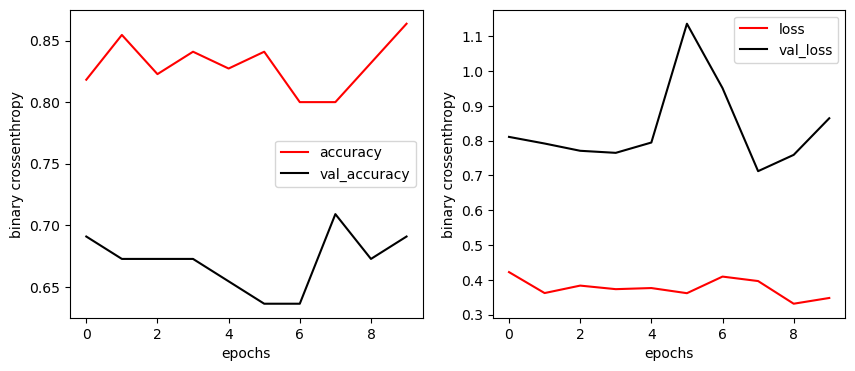

In [147]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (10,4))


ax1.plot(history.history["accuracy"], "r",   label = "accuracy")
ax1.plot(history.history["val_accuracy"], "k" , label = "val_accuracy")
ax1.set_xlabel("epochs")
ax1.set_ylabel("binary crossenthropy")
ax1.legend()
# plt.grid(True)



ax2.plot(history.history["loss"] ,"r" ,  label = "loss", )
ax2.plot(history.history["val_loss"],"k", label = "val_loss")
ax2.set_xlabel("epochs")
ax2.set_ylabel("binary crossenthropy")
ax2.legend()
# plt.grid(True)



plt.show()

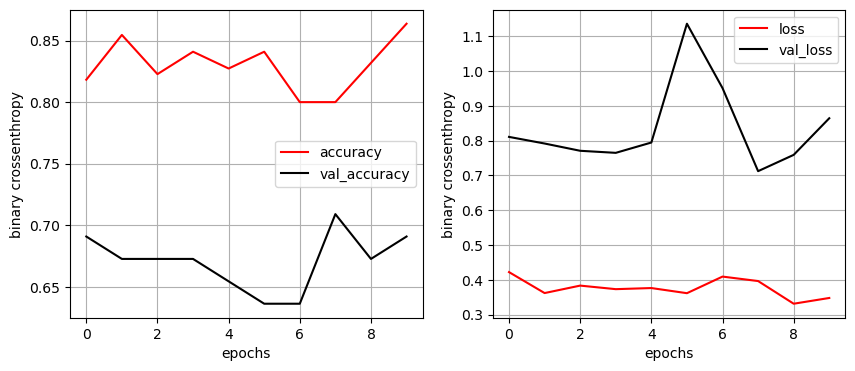

In [145]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (10,4))


ax1.plot(history.history["accuracy"], "r" , label = "accuracy")
ax1.plot(history.history["val_accuracy"], "k" , label = "val_accuracy")
ax1.set_xlabel("epochs")
ax1.set_ylabel("binary crossenthropy")
ax1.legend()
ax1.grid(True)



ax2.plot(history.history["loss"] ,"r" ,  label = "loss", )
ax2.plot(history.history["val_loss"],"k", label = "val_loss")
ax2.set_xlabel("epochs")
ax2.set_ylabel("binary crossenthropy")
ax2.legend()
ax2.grid(True)



plt.show()

In [141]:
range(len(Accuracy
         ))

range(0, 50)

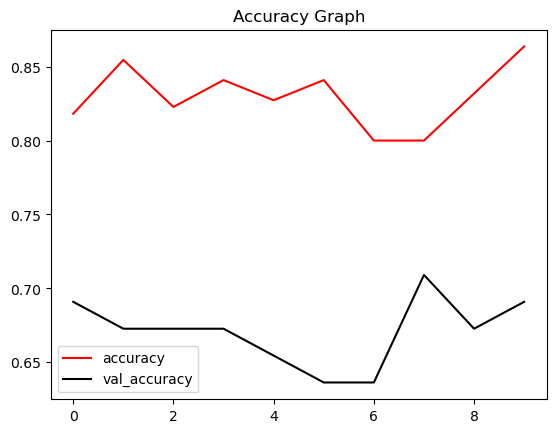

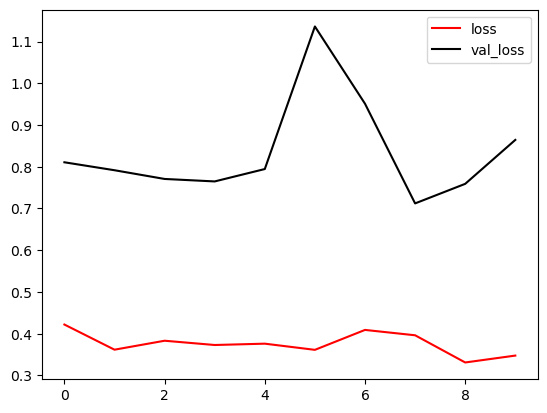

In [146]:
# fig, (ax1,ax2) = plt.subplots(1,2,figsize = (10,4))


plt.plot(epochs , history.history["accuracy"], "r", label = "accuracy")
plt.plot(epochs, history.history["val_accuracy"], "k" , label = "val_accuracy")
plt.title("Accuracy Graph")
plt.legend()
plt.figure()
# plt.grid(True)



plt.plot(epochs ,history.history["loss"] ,"r" ,  label = "loss")
plt.plot(epochs, history.history["val_loss"],"k", label = "val_loss")
# plt.set_xlabel("epochs")
# plt.set_ylabel("binary crossenthropy")
plt.legend()
# plt.grid(True)



plt.show()

The model didnt perorm well on validation loss, that means the model cant generalize to new data sets or new data sets


what to do .

1. optimize the model by trying different nodes, epochs and learning rate .
2. give more samples of data to the model.